To start, I'll set up the environment by getting my imports and mounting the drive so I don't have to re-upload the file with every new runtime.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Final Project/dokkan_cards.csv')

Let's take a quick peek at what we're working with here.

In [3]:
df.head()

,Title,Character,Max Level,SA Level,Rarity,Type,Cost,ID,JP Release Date,Global Release Date,...,EZA Active Skill Name,EZA Active Skill,EZA Activation Condition,Active Skill Name,Active Skill,Activation Condition,Unit Super Attack Name,Unit Super Attack Effect,EZA Unit Super Attack Name,EZA Unit Super Attack Effect
0,Supreme Warrior Awakened,Super Saiyan Goku,80/100,1/10,SSR to UR,AGL to Super AGL,16/23,1001,30 Jan 2015,Prior to 30 Oct 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pride Regained,Super Saiyan Vegeta,80/100,1/10,SSR to UR,TEQ to Extreme TEQ,16/23,1002,30 Jan 2015,Prior to 30 Oct 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Saiyan Among Us,Goku,60/80,1/10,SR to SSR,STR to Super STR,10/14,1003,30 Jan 2015,Prior to 30 Oct 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Genius of War,Vegeta,60/80,1/10,SR to SSR,TEQ to Super TEQ,10/14,1004,30 Jan 2015,Prior to 30 Oct 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Emperor of Iniquity,Frieza (1st Form),60/80,1/10,SR to SSR,STR to Extreme STR,8/12,1005,30 Jan 2015,Prior to 30 Oct 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.count()

,0
Title,2281
Character,2281
Max Level,2105
SA Level,2087
Rarity,2278
Type,2281
Cost,2105
ID,2281
JP Release Date,2081
Global Release Date,2057


There's a lot of extra columns here that will get in the way of what I want to accomplish with this analysis so I'm going to disregard a lot of the new features like transformations, active skills, and unit super attacks. I'll also be getting rid of most of the EZA details since we only need to know if a unit has one or not for the purpose of this analysis.

In [5]:
df_clean = df.drop(columns = ['Title', 'SA Level', 'Leader Skill', 'Super Attack Name', 'Super Attack Effect', 'Passive Skill Name', 'Passive Skill', 'Links', 'HP', 'Attack', 'Defense', 'Details', 'Ultra Super Attack Name', 'Ultra Super Attack Effect', 'Special Skills', 'References', 'Active Skill Name', 'Active Skill', 'Activation Condition', 'Unit Super Attack Name', 'Unit Super Attack Effect', 'Transforms Into', 'JP EZA Release Date', 'Global EZA Release Date', 'EZA Leader Skill', 'EZA Super Attack Name', 'EZA Super Attack Effect', 'EZA Passive Skill','EZA HP', 'EZA Attack', 'EZA Defense', 'EZA Transformation Condition', 'EZA Ultra Super Attack Name', 'EZA Ultra Super Attack Effect', 'EZA Active Skill Name', 'EZA Active Skill', 'EZA Activation Condition','EZA Unit Super Attack Name', 'EZA Unit Super Attack Effect', 'Transformation Type', 'Transformation Condition', 'EZA Transformation Condition'])
df_clean.count()

,0
Character,2281
Max Level,2105
Rarity,2278
Type,2281
Cost,2105
ID,2281
JP Release Date,2081
Global Release Date,2057
Categories,2086


Now let's get rid of all entries of transitional forms of units. This means we'll only be working with the final version of each card after awakening.

In [6]:
df_cleaned = df_clean.copy()
df_cleaned = df_cleaned.dropna(subset=['Max Level', 'JP Release Date', 'Global Release Date', 'Categories', 'Rarity'])
df_cleaned.count()

,0
Character,2014
Max Level,2014
Rarity,2014
Type,2014
Cost,2014
ID,2014
JP Release Date,2014
Global Release Date,2014
Categories,2014


Let's also change the entries for rarity since regular awakening doesn't change base rarity. We'll also also fix the typing here since every card here is, or becomes, Super/Extreme. Also also ALSO, we'll just say all cards released before October 30th of 2015 were released on that date for uniformity and simplicity.

In [7]:
rarity_mapping = {
    'N to R': 'N',
    'R to SR': 'R',
    'SR to SSR': 'SR',
    'SSR to UR': 'SSR'
}

df_cleaned.loc[:, 'Rarity'] = df_cleaned['Rarity'].replace(rarity_mapping)
df_cleaned.loc[:, 'Type'] = df_cleaned['Type'].str.split(' to ').str[-1]
df_cleaned.loc[:, 'Global Release Date'] = df_cleaned['Global Release Date'].str.split(' to ').str[-1]
df_cleaned.loc[:, 'Max Level'] = df_cleaned['Max Level'].str.split('/').str[0].astype(int)

Now that the data has been cleaned, let's get to answering the questions I had laid out starting with what character has the most units in the game. (hint: he might be really important in the series)

In [8]:
character_counts = df_cleaned['Character'].value_counts()
character_counts

,count
Character,
Super Saiyan Goku,44
Goku,36
Vegeta,27
Piccolo,27
Krillin,23
...,...
Trunks (Teen) (Future) & Mai (Future),1
Grand Supreme Kai,1
Kibito,1


Yep. It's Goku. Super Saiyan Goku specifically. Piccolo and Krillin do come as a surpise though, and Vegeta takes another L today.

Next, let's look at the distribution of the cards by rarity. My prediction is that it's mostly URs.

In [9]:
rarity_distribution = df_cleaned['Rarity'].value_counts(normalize=True) * 100
rarity_distribution

,proportion
Rarity,
SSR,39.424032
UR,35.054618
SR,12.363456
LR,5.809335
R,5.561072
N,1.787488


Wow, mostly SSRs huh? I guess I should've taken into consideration that pretty much all URs come from dokkan awakened SSRs.

Now let's look at the type distribution.

In [10]:
type_distribution = df_cleaned['Type'].value_counts(normalize=True) * 100
type_distribution

,proportion
Type,
Super STR,12.711023
Super TEQ,12.512413
Super AGL,12.264151
Super PHY,11.966236
Super INT,11.569017
Extreme STR,8.142999
Extreme AGL,7.994042
Extreme PHY,7.845084
Extreme INT,7.745780


Distribution is mostly even across the typings. The only difference here is the disparity between Super and Extreme types. I guess it's to be expected that the heros are more popular than the villians though.

Let's take a look at the relationship between rarity and max level.

In [11]:
correlation = df_cleaned[['Rarity', 'Max Level']]
correlation.groupby('Rarity')['Max Level'].mean()

,Max Level
Rarity,
LR,150.0
N,20.0
R,40.0
SR,60.0
SSR,80.0
UR,120.0


For those unfamiliar with Dokkan Battle, the max level is one to one with rarity and usually does not vary. The max level for LRs will always be 150 for example.
The only exception is for EZAs where the max level for URs raises by 20.

Lastly, let's find out the average amount of time it takes for a unit released on JP to come to Global.

In [12]:
df_cleaned['JP Release Date'] = pd.to_datetime(df_cleaned['JP Release Date'], errors='coerce')
df_cleaned['Global Release Date'] = pd.to_datetime(df_cleaned['Global Release Date'], errors='coerce')

df_cleaned['Release Delay'] = (df_cleaned['Global Release Date'] - df_cleaned['JP Release Date']).dt.days

df_cleaned = df_cleaned.dropna(subset=['Release Delay'])

average_delay = df_cleaned['Release Delay'].mean()
average_delay

131.95034756703078

A third of the year sounds about right... a bit on the lower end of what I had predicted actually. It's a good thing that they plan to sync the servers soon.

Alright, time to put this data on charts.

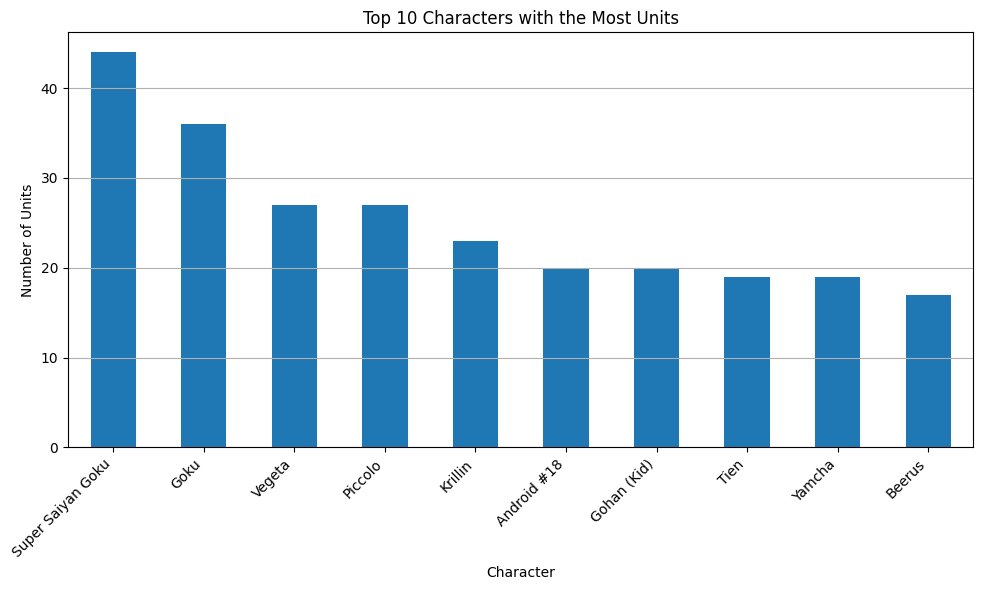

In [164]:
plt.figure(figsize=(10, 6))
character_counts.head(10).plot(kind='bar')
plt.title('Top 10 Characters with the Most Units')
plt.xlabel('Character')
plt.ylabel('Number of Units')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

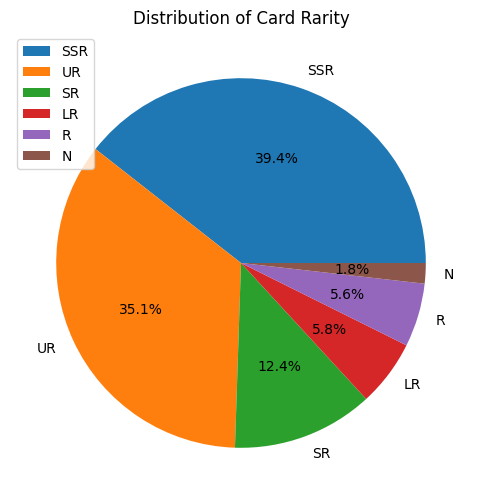

In [14]:
plt.figure(figsize=(10,6))
rarity_distribution.plot(kind='pie', autopct='%1.1f%%', legend=True)
plt.title('Distribution of Card Rarity')
plt.ylabel('')
plt.show()

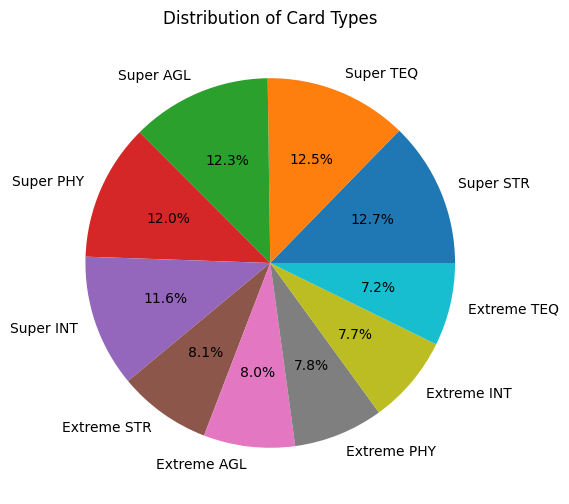

In [15]:
plt.figure(figsize=(10,6))
type_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Card Types')
plt.ylabel('')
plt.show()

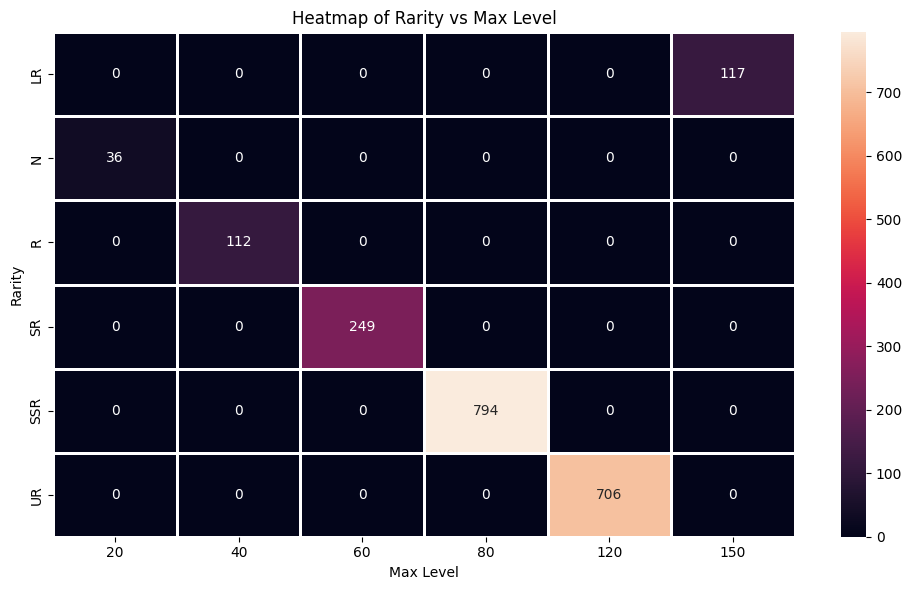

In [162]:
heatmap_data = df_cleaned.pivot_table(index='Rarity', columns='Max Level', values='Character', aggfunc='count', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', linewidths=1)

plt.title('Heatmap of Rarity vs Max Level')
plt.xlabel('Max Level')
plt.ylabel('Rarity')
plt.tight_layout()

plt.show()

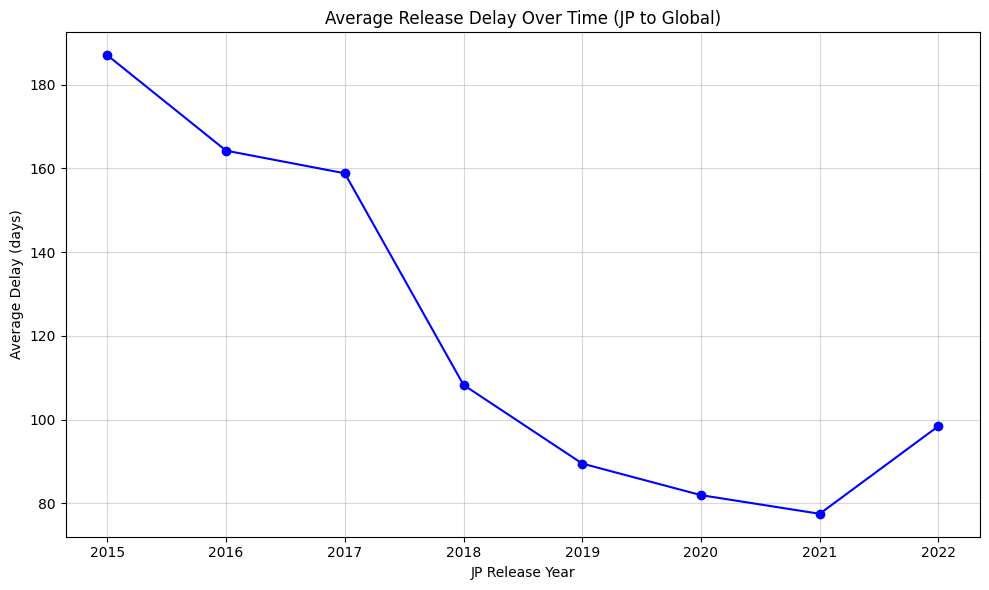

In [151]:
df_cleaned['JP Release Year'] = df_cleaned['JP Release Date'].dt.year

average_delay_by_year = df_cleaned.groupby('JP Release Year')['Release Delay'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_delay_by_year.index, average_delay_by_year.values, marker='o', color='blue')
plt.title('Average Release Delay Over Time (JP to Global)')
plt.xlabel('JP Release Year')
plt.ylabel('Average Delay (days)')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


Now comes the fun part of watching machine learning get things wrong because I'm not nearly experienced enough to use a more advanced model :D

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

average_delay_by_year = df_cleaned.groupby('JP Release Year')['Release Delay'].mean().reset_index()

X = average_delay_by_year[['JP Release Year']]
y = average_delay_by_year['Release Delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=19)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Mean Squared Error: 42.52125455047567


Do a bit of fiddling with test size and the random state to lower the MSE and...

In [134]:
future_years = pd.DataFrame({'JP Release Year': [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]})

future_predictions = model.predict(future_years)

for year, delay in zip(future_years['JP Release Year'], future_predictions):
    print(f"Predicted release delay for {year}: {delay}")


Predicted release delay for 2023: 51.823864668851456
Predicted release delay for 2024: 36.69395400580106
Predicted release delay for 2025: 21.564043342754303
Predicted release delay for 2026: 6.434132679703907
Predicted release delay for 2027: -8.69577798334285
Predicted release delay for 2028: -23.825688646393246
Predicted release delay for 2029: -38.955599309440004
Predicted release delay for 2030: -54.0855099724904


Yep. Dum. Bandai would never allow the Global server to get ahead of JP... I will note however that if we ignore 2027 onward, the game is actually "currently" syncing the servers. So it's not too far off in its predictions; it's only off by about a year or so which in my book is acceptable.